I - Theorical questions:

1. Definitions:

mean: sum of all values divided by the number of observations

std deviation: sqrt(variance)

variance: gives an information about how well the mean represents the dataset / how does the data varies around the mean 

2. Definitions:

Correlation coefficient of 2 variables: A.K.A "r", it takes values between -1 and 1. The name is kinda self explanatory in itself, the idea is to know how 2 dataset relate to each other...


In [27]:
#Exercise 1: question 1: 
#We want the min/max/mean/median values for the attached dataset

#first step: load the dataset
import pandas as pd
import numpy as np

dataset = pd.read_csv("Attachments session no1/Exercice1.csv")
dataset.head()


,Ech1,Ech2
0,10.3379,0.1812
1,9.6524,0.0172
2,7.0915,1.1038
3,12.9593,0.5032
4,9.9614,1.4849


In [28]:
#get the following values: min/max/mean/median for Ech1
minValEch1 = dataset.Ech1.min()
maxValEch1 = dataset.Ech1.max()
meanValEch1 = dataset.Ech1.mean()
medianValEch1 = dataset.Ech1.median()
#other way of doing this:
dataset.Ech1.describe()

count    150.000000
mean       9.993313
std        2.529751
min        3.877500
25%        8.226375
50%        9.895400
75%       11.658425
max       15.931600
Name: Ech1, dtype: float64

In [29]:
#Exercise 1: question 1 (extra...):
#modify the min and max value of the dataset, then give the new max/min/... values

_Ech1 = pd.Series(dataset.Ech1)

_Ech1[_Ech1 == _Ech1.max()] = 11
_Ech1[_Ech1 == _Ech1.min()] = 9
_Ech1.describe()
#observations?
#Outliers can have a big effect on those measures, especially knowing how small the dataset is.


count    150.000000
mean       9.994585
std        2.434208
min        4.052100
25%        8.288475
50%        9.895400
75%       11.595025
max       15.531400
Name: Ech1, dtype: float64

<AxesSubplot:>

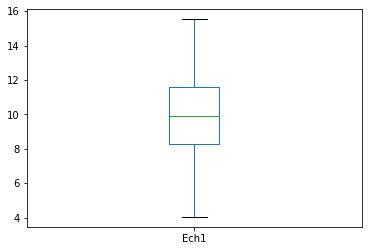

In [30]:
#Exercise 1: question 2

#Draw the whisker plot for Ech1
dataset.Ech1.plot.box()

#to answer the question:
# The whiskers are the min and max values of the dataset
# the quartiles are represented by the lines of the box between the whiskers...
# their values were given above, in the previous question by using the .describe method
#Here's a perfect example of how drastical the effect of outliers can be.. 

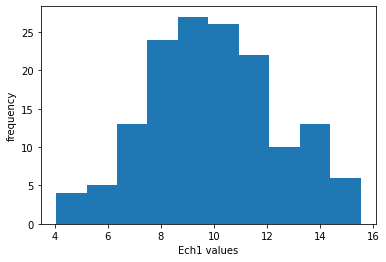

In [31]:
#Exercise 1: question 3:

#Histogram of Ech1
from matplotlib import pyplot as plt
plt.hist(dataset.Ech1)
plt.xlabel('Ech1 values')
plt.ylabel('frequency')
plt.show()

#It looks a liiittleeee bit like a normal distribution


In [86]:
#Exercise 2: question 1

#first step: load the dataset
dataset_2 = pd.read_csv("Attachments session no1/Exercice2.csv")
dataset_2.head()


,Sujet,1,2,3,4,5,6,7,8,9,10,11
0,Taille,1.75,1.67,1.82,1.6,1.75,1.8,1.72,1.6,1.9,1.8,1.65
1,Poids,81.00,63.00,90.00,61.0,69.00,78.0,68.00,56.0,95.0,84.0,60.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
#the aim here is to calculate the correlation between the rows "Taille" and "Poids"
#BUT: this dataset needs some cleaning... let's remove rows 2,3 and 4
dataset_2= dataset_2.dropna()
dataset_2

,Sujet,1,2,3,4,5,6,7,8,9,10,11
0,Taille,1.75,1.67,1.82,1.6,1.75,1.8,1.72,1.6,1.9,1.8,1.65
1,Poids,81.00,63.00,90.00,61.0,69.00,78.0,68.00,56.0,95.0,84.0,60.00


In [91]:
#This looks good.. I'm just going to set "Sujet" column as an index column since "Taille" and "Poids" are not actual values,
#and might be a problem to deal with when making calculations in later questions...
dataset_cleansened = dataset_2.set_index("Sujet")
dataset_cleansened


,1,2,3,4,5,6,7,8,9,10,11
Sujet,,,,,,,,,,,
Taille,1.75,1.67,1.82,1.6,1.75,1.8,1.72,1.6,1.9,1.8,1.65
Poids,81.00,63.00,90.00,61.0,69.00,78.0,68.00,56.0,95.0,84.0,60.00


In [98]:
#The dataset has been cleansed, we can use it to calculate the correlation
_ = dataset_cleansened.loc['Taille'].corr(dataset_cleansened.loc['Poids'])

#Test if the functions work properly with a quick autocorrelation to check that the returned value is 1
_1 = dataset_cleansened.loc['Taille'].corr(dataset_cleansened.loc['Taille']) 
_2 = dataset_cleansened.loc['Poids'].corr(dataset_cleansened.loc['Poids']) 

_
#the coefficient of correlation is pretty high (knowing that -1<r<1). That implies a linear relationship between height and weight.
#watch out: height does not necessarily cause weight (and as you've prolly guessed, same goes for the opposite...)


0.9494036601337497